### 1. Data input

In [29]:
import numpy    as np
import pandas   as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates  as mdt

data    =   pd.read_excel('HIST_PAINEL_COVIDBR_20200514.xlsx')


### 2. Time axis conversion to days

In [30]:
Brasil = data[data['regiao'] == 'Brasil']
date   = pd.to_datetime(Brasil['data'])
t      = np.empty(len(date), dtype='int')
now    = datetime.datetime.now().timestamp()

for k, d in enumerate(date):
    t[k] = int((d.timestamp() - now)/86400)

Brasil.set_index(t, inplace=True)    


### 3. All Brazil modelling

#### 3.1. Logistic model

In [31]:
from scipy.optimize import curve_fit

def model(t, p1, p2, p3):
    return p1/(1 + np.exp(-(t - p2)/p3))


#### 3.2. Accumulated number of infected people

Final maximum value:       405836 persons.
Days from inflexion point:   -0.4 days.   
Epidemic spreading:          11.0 days.   


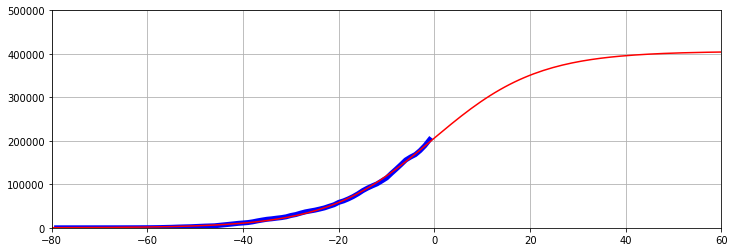

In [32]:
X    =  Brasil['casosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax, -60,  5)     # lower bounds
P0   = (1.5*Xmax,   0, 10)     # initial guesses
Pmax = (2.0*Xmax,  60, 30)     # upper bounds
            
P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(-80, 60, 140)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.grid(True)
plt.axis([-80, 60, 0, 500000])

print('Final maximum value:       {0:6.0f} persons.'.format(P[0]))
print('Days from inflexion point: {0:6.1f} days.   '.format(P[1]))
print('Epidemic spreading:        {0:6.1f} days.   '.format(P[2]))


#### 3.3. Accumulated number of deceased people

Final maximum value:        26917 persons.
Days from inflexion point:   -1.4 days.   
Epidemic spreading:          10.4 days.   


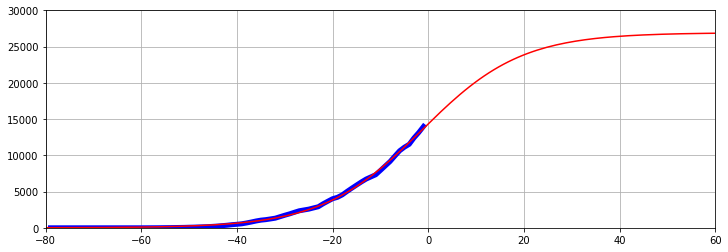

In [33]:
X    =  Brasil['obitosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax, -60,  5)     # lower bounds
P0   = (1.5*Xmax,   0, 10)     # initial guesses
Pmax = (2.0*Xmax,  60, 30)     # upper bounds
             
P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(-80, 60, 140)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.grid(True)
plt.axis([-80, 60, 0, 30000])

print('Final maximum value:       {0:6.0f} persons.'.format(P[0]))
print('Days from inflexion point: {0:6.1f} days.   '.format(P[1]))
print('Epidemic spreading:        {0:6.1f} days.   '.format(P[2]))


### 4. Plots for some subset

#### 4.1. Data selection


In [34]:
RS       = data[data['estado'] == 'RS']
RS       = RS.groupby('data').sum()

date   = pd.to_datetime(RS.index)
t      = np.empty(len(date), dtype='int')
now    = datetime.datetime.now().timestamp()

for k, d in enumerate(date):
    t[k] = int((d.timestamp() - now)/86400)

RS.set_index(t, inplace=True)    


#### 4.2. Accumulated cases of infected people

Final maximum value:        11988 persons.
Days from inflexion point:   -0.2 days.   
Epidemic spreading:          14.1 days.   


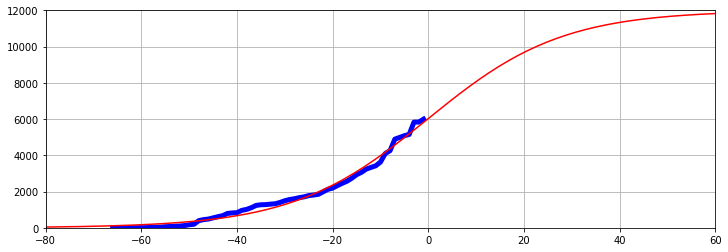

In [35]:
X    =  RS['casosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax, -60,  5)     # lower bounds
P0   = (1.5*Xmax,   0, 10)     # initial guesses
Pmax = (2.0*Xmax,  60, 30)     # upper bounds
            
P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(-80, 60, 140)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.grid(True)
plt.axis([-80, 60, 0, 12000])

print('Final maximum value:       {0:6.0f} persons.'.format(P[0]))
print('Days from inflexion point: {0:6.1f} days.   '.format(P[1]))
print('Epidemic spreading:        {0:6.1f} days.   '.format(P[2]))


#### 4.3. Accumulated cases of deceased people

Final maximum value:          418 persons.
Days from inflexion point:   -4.1 days.   
Epidemic spreading:          10.5 days.   


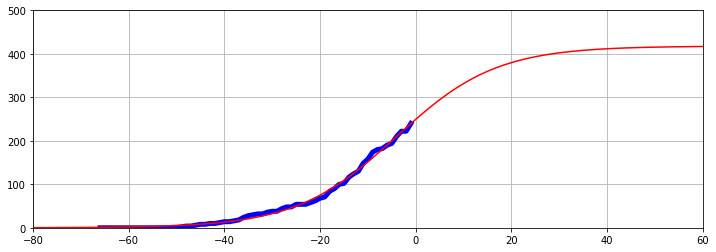

In [36]:
X    =  RS['obitosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax, -60,  5)     # lower bounds
P0   = (1.5*Xmax,   0, 10)     # initial guesses
Pmax = (2.0*Xmax,  60, 30)     # upper bounds
            
P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(-80, 60, 140)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.grid(True)
plt.axis([-80, 60, 0, 500])

print('Final maximum value:       {0:6.0f} persons.'.format(P[0]))
print('Days from inflexion point: {0:6.1f} days.   '.format(P[1]))
print('Epidemic spreading:        {0:6.1f} days.   '.format(P[2]))
